In [1]:
 !pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.6/33.6 MB 15.8 MB/s eta 0:00:00


In [3]:
import tensorflow as tf
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [4]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [5]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [6]:
def draw_landmarks(image, results):
#     mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS ) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [ ]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [7]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS , 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [ ]:
cap = cv2.VideoCapture(0) 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret,frame = cap.read()
        
        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # Show to screen
        print(frame)
        cv2.imshow('OpenCV frame', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
            
cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
[[[ 5 11  6]
  [ 5 11  6]
  [ 5 11  6]
  ...
  [80 61 35]
  [77 60 34]
  [77 60 35]]

 [[ 5 11  6]
  [ 5 11  6]
  [ 5 11  6]
  ...
  [79 62 33]
  [78 62 34]
  [77 61 33]]

 [[ 5 11  6]
  [ 5 11  6]
  [ 5 11  6]
  ...
  [79 64 32]
  [76 63 30]
  [72 60 27]]

 ...

 [[29 27 16]
  [28 25 15]
  [28 25 16]
  ...
  [ 2  8 10]
  [ 1  7  9]
  [ 1  7  9]]

 [[29 26 17]
  [29 26 17]
  [29 26 17]
  ...
  [ 1  7  9]
  [ 1  7  9]
  [ 1  7  9]]

 [[30 27 18]
  [30 27 18]
  [30 27 18]
  ...
  [ 1  7 11]
  [ 1  7 11]
  [ 1  7 11]]]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
[[[ 6 13  5]
  [ 6 12  6]
  [ 6 12  7]
  ...
  [80 66 32]
  [79 64 31]
  [77 62 29]]

 [[ 7 11  4]
  [ 6 11  5]
  [ 5 11  6]
  ...
  [81 66 31]
  [78 63 28]
  [76 61 26]]

 [[ 4 10  5]
  [ 5 11  6]
  [ 4 10  5]
  ...
  [79 62 26]
  [78 61 26]
  [77 60 25]]

 ...

 [[29 29 18]
  [29 29 18]
  [29 29 18]
  ...
  [ 0  6  8]
  [ 0  6  8]
  [ 1  7  9]]

 [[31 29 18]
 

<class 'mediapipe.python.solution_base.SolutionOutputs'>
[[[ 68 108 123]
  [ 70 110 125]
  [ 72 112 126]
  ...
  [229 200 180]
  [228 198 181]
  [224 194 176]]

 [[ 69 107 121]
  [ 70 109 124]
  [ 69 109 124]
  ...
  [224 199 179]
  [218 193 175]
  [218 193 175]]

 [[ 70 108 123]
  [ 70 108 123]
  [ 70 108 123]
  ...
  [221 196 179]
  [222 196 178]
  [222 196 178]]

 ...

 [[152 151 147]
  [149 148 142]
  [149 148 141]
  ...
  [ 46  93 122]
  [ 46  94 122]
  [ 49  98 125]]

 [[152 152 145]
  [150 150 142]
  [150 150 141]
  ...
  [ 45  92 124]
  [ 47  94 127]
  [ 51  98 130]]

 [[150 152 145]
  [150 152 144]
  [150 152 143]
  ...
  [ 46  95 130]
  [ 47  96 131]
  [ 47  96 131]]]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
[[[ 80 108 114]
  [ 80 112 118]
  [ 78 113 119]
  ...
  [221 200 185]
  [220 198 184]
  [218 196 182]]

 [[ 83 109 115]
  [ 83 113 119]
  [ 79 112 118]
  ...
  [221 201 186]
  [220 201 187]
  [215 196 182]]

 [[ 82 108 114]
  [ 80 109 115]
  [ 77 109 115]


<class 'mediapipe.python.solution_base.SolutionOutputs'>
[[[ 80 111 124]
  [ 81 108 123]
  [ 84 108 124]
  ...
  [217 198 198]
  [216 198 197]
  [214 196 195]]

 [[ 80 111 124]
  [ 80 109 122]
  [ 81 107 121]
  ...
  [217 198 196]
  [215 197 194]
  [214 196 193]]

 [[ 80 111 124]
  [ 81 110 123]
  [ 81 107 121]
  ...
  [215 197 190]
  [214 197 190]
  [211 195 187]]

 ...

 [[152 155 160]
  [147 151 155]
  [147 151 155]
  ...
  [ 53 101 139]
  [ 53 102 138]
  [ 52 101 137]]

 [[145 156 160]
  [144 153 158]
  [146 154 160]
  ...
  [ 51 100 139]
  [ 51  99 138]
  [ 52 100 139]]

 [[138 155 160]
  [140 155 161]
  [142 154 162]
  ...
  [ 51 101 140]
  [ 52 100 139]
  [ 53 101 140]]]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
[[[ 92 113 130]
  [ 94 114 132]
  [ 92 113 131]
  ...
  [214 199 188]
  [212 198 188]
  [209 196 186]]

 [[ 90 114 128]
  [ 91 115 130]
  [ 90 114 130]
  ...
  [215 201 187]
  [213 200 185]
  [209 197 182]]

 [[ 89 113 125]
  [ 90 115 126]
  [ 90 115 126]


<class 'mediapipe.python.solution_base.SolutionOutputs'>
[[[ 79 110 125]
  [ 77 112 128]
  [ 73 112 129]
  ...
  [216 199 188]
  [216 198 188]
  [215 196 187]]

 [[ 79 110 123]
  [ 77 111 125]
  [ 76 114 128]
  ...
  [212 197 184]
  [214 198 186]
  [215 199 187]]

 [[ 77 110 123]
  [ 74 108 122]
  [ 74 109 124]
  ...
  [211 196 182]
  [211 196 182]
  [214 199 184]]

 ...

 [[146 155 158]
  [145 155 158]
  [147 157 161]
  ...
  [ 57  57  67]
  [ 60  60  69]
  [ 64  64  73]]

 [[144 153 154]
  [145 155 156]
  [145 157 158]
  ...
  [ 55  57  68]
  [ 58  59  71]
  [ 61  63  74]]

 [[143 152 153]
  [143 153 154]
  [142 153 156]
  ...
  [ 54  56  68]
  [ 56  58  70]
  [ 59  61  72]]]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
[[[ 64 115 124]
  [ 63 113 125]
  [ 66 113 129]
  ...
  [225 199 189]
  [222 197 186]
  [221 196 185]]

 [[ 65 114 121]
  [ 66 113 122]
  [ 69 114 125]
  ...
  [222 199 187]
  [220 198 186]
  [221 199 187]]

 [[ 68 112 120]
  [ 68 113 122]
  [ 67 113 124]


<class 'mediapipe.python.solution_base.SolutionOutputs'>
[[[ 94 113 120]
  [ 93 113 121]
  [ 92 112 122]
  ...
  [226 202 190]
  [225 202 191]
  [223 201 189]]

 [[ 92 112 122]
  [ 90 111 121]
  [ 89 111 121]
  ...
  [223 200 188]
  [221 199 187]
  [220 198 186]]

 [[ 91 111 121]
  [ 90 110 120]
  [ 88 108 120]
  ...
  [220 199 187]
  [219 199 187]
  [219 199 187]]

 ...

 [[137 133 170]
  [116 103 151]
  [ 86  63 125]
  ...
  [ 53 109 147]
  [ 56 109 147]
  [ 55 107 146]]

 [[119 117 158]
  [106  93 143]
  [ 86  64 123]
  ...
  [ 53 111 151]
  [ 52 108 149]
  [ 51 107 148]]

 [[125 123 164]
  [100  87 137]
  [ 96  73 132]
  ...
  [ 52 110 150]
  [ 51 107 148]
  [ 51 107 148]]]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
[[[ 82 112 132]
  [ 82 112 131]
  [ 82 113 128]
  ...
  [226 206 189]
  [227 203 189]
  [227 202 189]]

 [[ 86 113 131]
  [ 86 114 131]
  [ 85 113 128]
  ...
  [222 205 187]
  [223 204 187]
  [223 203 187]]

 [[ 87 115 133]
  [ 86 114 131]
  [ 86 114 130]


<class 'mediapipe.python.solution_base.SolutionOutputs'>
[[[100 115 127]
  [ 97 116 126]
  [ 94 118 125]
  ...
  [227 202 192]
  [223 202 188]
  [222 201 186]]

 [[ 97 112 127]
  [ 93 112 124]
  [ 90 113 122]
  ...
  [223 199 191]
  [222 200 188]
  [221 199 187]]

 [[ 96 110 127]
  [ 92 110 125]
  [ 89 110 124]
  ...
  [221 199 192]
  [220 200 190]
  [219 199 189]]

 ...

 [[154 156 167]
  [141 142 165]
  [139 138 174]
  ...
  [ 52 102 138]
  [ 53 102 138]
  [ 54 103 139]]

 [[144 147 163]
  [137 140 166]
  [135 138 176]
  ...
  [ 50 102 139]
  [ 52 103 141]
  [ 54 104 142]]

 [[140 147 165]
  [134 141 170]
  [131 137 180]
  ...
  [ 49 103 140]
  [ 49 102 140]
  [ 49 102 140]]]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
[[[ 73 113 127]
  [ 77 112 127]
  [ 81 112 127]
  ...
  [217 202 193]
  [219 200 193]
  [218 199 192]]

 [[ 70 112 126]
  [ 73 111 126]
  [ 79 112 127]
  ...
  [213 200 187]
  [216 200 190]
  [215 199 189]]

 [[ 72 112 124]
  [ 75 112 124]
  [ 80 114 127]


<class 'mediapipe.python.solution_base.SolutionOutputs'>
[[[ 86 114 112]
  [ 85 116 111]
  [ 82 118 111]
  ...
  [221 202 194]
  [219 201 191]
  [218 200 190]]

 [[ 83 112 114]
  [ 84 114 114]
  [ 83 116 113]
  ...
  [219 203 191]
  [213 196 184]
  [211 193 181]]

 [[ 84 110 117]
  [ 83 110 115]
  [ 83 112 114]
  ...
  [218 202 189]
  [217 199 187]
  [210 192 180]]

 ...

 [[153 159 165]
  [143 147 164]
  [137 136 168]
  ...
  [ 49 108 134]
  [ 49 107 133]
  [ 49 107 133]]

 [[150 155 161]
  [141 144 163]
  [138 137 171]
  ...
  [ 49 107 133]
  [ 50 105 132]
  [ 50 105 132]]

 [[147 152 161]
  [141 143 166]
  [137 135 174]
  ...
  [ 51 108 134]
  [ 52 108 135]
  [ 52 107 133]]]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
[[[ 67 118 132]
  [ 72 120 132]
  [ 77 119 131]
  ...
  [221 205 195]
  [219 204 192]
  [215 199 187]]

 [[ 67 119 130]
  [ 72 120 130]
  [ 75 119 128]
  ...
  [220 204 193]
  [219 204 192]
  [214 198 186]]

 [[ 72 117 129]
  [ 76 120 130]
  [ 77 118 128]


<class 'mediapipe.python.solution_base.SolutionOutputs'>
[[[ 85 116 127]
  [ 86 116 127]
  [ 87 116 127]
  ...
  [223 204 191]
  [220 203 189]
  [218 201 186]]

 [[ 85 116 127]
  [ 86 116 127]
  [ 86 115 126]
  ...
  [222 204 191]
  [220 203 189]
  [219 202 188]]

 [[ 81 115 128]
  [ 82 115 127]
  [ 82 114 125]
  ...
  [220 205 190]
  [217 202 188]
  [215 200 185]]

 ...

 [[150 158 164]
  [148 157 165]
  [148 159 171]
  ...
  [ 50 102 134]
  [ 66 110 143]
  [ 66 110 143]]

 [[148 156 160]
  [146 156 166]
  [138 149 169]
  ...
  [ 54 109 139]
  [ 60 113 142]
  [ 60 112 141]]

 [[149 154 160]
  [145 153 165]
  [137 148 169]
  ...
  [ 56 112 142]
  [ 59 112 141]
  [ 58 110 140]]]


KeyboardInterrupt: 

In [ ]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
results.face_landmarks

landmark {
  x: 0.32738742232322693
  y: 0.6527709364891052
  z: -0.029845302924513817
}
landmark {
  x: 0.33054032921791077
  y: 0.6063047051429749
  z: -0.04789118841290474
}
landmark {
  x: 0.3281627893447876
  y: 0.6221869587898254
  z: -0.02684250846505165
}
landmark {
  x: 0.32095450162887573
  y: 0.5640210509300232
  z: -0.033760733902454376
}
landmark {
  x: 0.3307402729988098
  y: 0.5924084186553955
  z: -0.0501902811229229
}
landmark {
  x: 0.32998308539390564
  y: 0.5752411484718323
  z: -0.04552394524216652
}
landmark {
  x: 0.327394038438797
  y: 0.5352083444595337
  z: -0.01775795966386795
}
landmark {
  x: 0.25601744651794434
  y: 0.5389175415039062
  z: 0.011318076401948929
}
landmark {
  x: 0.32662490010261536
  y: 0.5004256367683411
  z: -0.00931677408516407
}
landmark {
  x: 0.32683244347572327
  y: 0.4809092581272125
  z: -0.009654360823333263
}
landmark {
  x: 0.32586976885795593
  y: 0.4184955954551697
  z: 0.0047240532003343105
}
landmark {
  x: 0.327118188142776

In [ ]:
results

mediapipe.python.solution_base.SolutionOutputs

In [ ]:
len(results.left_hand_landmarks.landmark)

21

In [ ]:
frame

array([[[ 88, 115, 126],
        [ 88, 116, 127],
        [ 87, 116, 127],
        ...,
        [227, 202, 191],
        [228, 201, 189],
        [227, 199, 188]],

       [[ 85, 113, 127],
        [ 86, 115, 128],
        [ 86, 115, 128],
        ...,
        [224, 203, 190],
        [220, 198, 186],
        [220, 198, 186]],

       [[ 83, 112, 125],
        [ 84, 112, 125],
        [ 83, 112, 125],
        ...,
        [220, 201, 187],
        [216, 196, 182],
        [216, 196, 182]],

       ...,

       [[150, 158, 162],
        [148, 156, 159],
        [145, 153, 157],
        ...,
        [ 44, 110, 142],
        [ 41, 106, 139],
        [ 36, 101, 134]],

       [[150, 158, 162],
        [148, 156, 160],
        [145, 153, 159],
        ...,
        [ 39, 108, 140],
        [ 39, 106, 139],
        [ 38, 105, 138]],

       [[150, 158, 162],
        [148, 156, 160],
        [145, 152, 161],
        ...,
        [ 35, 107, 139],
        [ 36, 106, 139],
        [ 37, 106, 139]]

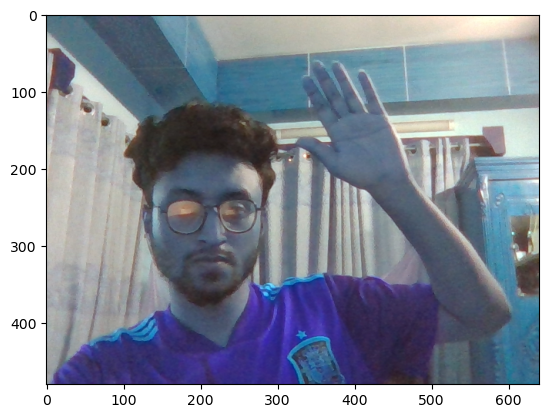

In [ ]:
plt.imshow(frame)

In [ ]:
results

mediapipe.python.solution_base.SolutionOutputs

In [ ]:
draw_landmarks(frame,results)

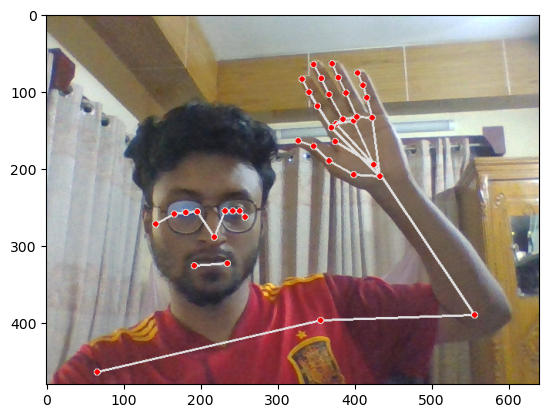

In [ ]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [ ]:
len(results.left_hand_landmarks.landmark)

21

In [ ]:
len(results.face_landmarks.landmark)

468

In [ ]:
len(results.pose_landmarks.landmark)

33

In [ ]:
results.pose_landmarks

landmark {
  x: 0.3410640060901642
  y: 0.6023016571998596
  z: -0.803066611289978
  visibility: 0.9999600648880005
}
landmark {
  x: 0.36294668912887573
  y: 0.5321620106697083
  z: -0.7209697961807251
  visibility: 0.9998981952667236
}
landmark {
  x: 0.3787161707878113
  y: 0.5320733785629272
  z: -0.7205973863601685
  visibility: 0.9998980760574341
}
landmark {
  x: 0.39270538091659546
  y: 0.5323638319969177
  z: -0.7203715443611145
  visibility: 0.9998897314071655
}
landmark {
  x: 0.3063885569572449
  y: 0.5338536500930786
  z: -0.7457132339477539
  visibility: 0.9999148845672607
}
landmark {
  x: 0.2829831540584564
  y: 0.5363721251487732
  z: -0.7450026869773865
  visibility: 0.999914288520813
}
landmark {
  x: 0.2597786784172058
  y: 0.5396808981895447
  z: -0.7453345060348511
  visibility: 0.9999092221260071
}
landmark {
  x: 0.4045630097389221
  y: 0.5491653680801392
  z: -0.29165709018707275
  visibility: 0.9999125599861145
}
landmark {
  x: 0.22247226536273956
  y: 0.5674

In [ ]:
results.pose_landmarks.landmark[0].visibility

0.9999600648880005

In [ ]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [ ]:
test

array([ 3.62484276e-01,  3.38450956e+00, -4.18697059e-01,  1.06607200e-04])

In [ ]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [ ]:
pose

array([ 3.41064006e-01,  6.02301657e-01, -8.03066611e-01,  9.99960065e-01,
        3.62946689e-01,  5.32162011e-01, -7.20969796e-01,  9.99898195e-01,
        3.78716171e-01,  5.32073379e-01, -7.20597386e-01,  9.99898076e-01,
        3.92705381e-01,  5.32363832e-01, -7.20371544e-01,  9.99889731e-01,
        3.06388557e-01,  5.33853650e-01, -7.45713234e-01,  9.99914885e-01,
        2.82983154e-01,  5.36372125e-01, -7.45002687e-01,  9.99914289e-01,
        2.59778678e-01,  5.39680898e-01, -7.45334506e-01,  9.99909222e-01,
        4.04563010e-01,  5.49165368e-01, -2.91657090e-01,  9.99912560e-01,
        2.22472265e-01,  5.67400694e-01, -3.88982534e-01,  9.99940157e-01,
        3.67458433e-01,  6.73273981e-01, -6.45936131e-01,  9.99909222e-01,
        3.00407827e-01,  6.79254174e-01, -6.75982594e-01,  9.99925137e-01,
        5.57770491e-01,  8.28902423e-01, -1.52339324e-01,  9.99431491e-01,
        1.03837289e-01,  9.67538118e-01, -2.12630585e-01,  9.97443736e-01,
        8.69895458e-01,  

In [ ]:
rh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
face

array([ 0.32738742,  0.65277094, -0.0298453 , ...,  0.39488062,
        0.52691698,  0.02313733])

In [ ]:
results.face_landmarks.landmark[0]

x: 0.32738742232322693
y: 0.6527709364891052
z: -0.029845302924513817

In [ ]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [ ]:
len(results.face_landmarks.landmark)*3

1404

In [ ]:
np.zeros(21*3).shape

(63,)

In [ ]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
#     face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, lh, rh])

In [ ]:
extract_keypoints(results)[:10]

array([ 0.34106401,  0.60230166, -0.80306661,  0.99996006,  0.36294669,
        0.53216201, -0.7209698 ,  0.9998982 ,  0.37871617,  0.53207338])

In [ ]:
extract_keypoints(results).shape

(258,)

In [ ]:
result_test = extract_keypoints(results)

In [ ]:
result_test

array([ 3.41064006e-01,  6.02301657e-01, -8.03066611e-01,  9.99960065e-01,
        3.62946689e-01,  5.32162011e-01, -7.20969796e-01,  9.99898195e-01,
        3.78716171e-01,  5.32073379e-01, -7.20597386e-01,  9.99898076e-01,
        3.92705381e-01,  5.32363832e-01, -7.20371544e-01,  9.99889731e-01,
        3.06388557e-01,  5.33853650e-01, -7.45713234e-01,  9.99914885e-01,
        2.82983154e-01,  5.36372125e-01, -7.45002687e-01,  9.99914289e-01,
        2.59778678e-01,  5.39680898e-01, -7.45334506e-01,  9.99909222e-01,
        4.04563010e-01,  5.49165368e-01, -2.91657090e-01,  9.99912560e-01,
        2.22472265e-01,  5.67400694e-01, -3.88982534e-01,  9.99940157e-01,
        3.67458433e-01,  6.73273981e-01, -6.45936131e-01,  9.99909222e-01,
        3.00407827e-01,  6.79254174e-01, -6.75982594e-01,  9.99925137e-01,
        5.57770491e-01,  8.28902423e-01, -1.52339324e-01,  9.99431491e-01,
        1.03837289e-01,  9.67538118e-01, -2.12630585e-01,  9.97443736e-01,
        8.69895458e-01,  

In [ ]:
np.save('0', result_test)

In [ ]:
np.load('0.npy')

array([ 3.41064006e-01,  6.02301657e-01, -8.03066611e-01,  9.99960065e-01,
        3.62946689e-01,  5.32162011e-01, -7.20969796e-01,  9.99898195e-01,
        3.78716171e-01,  5.32073379e-01, -7.20597386e-01,  9.99898076e-01,
        3.92705381e-01,  5.32363832e-01, -7.20371544e-01,  9.99889731e-01,
        3.06388557e-01,  5.33853650e-01, -7.45713234e-01,  9.99914885e-01,
        2.82983154e-01,  5.36372125e-01, -7.45002687e-01,  9.99914289e-01,
        2.59778678e-01,  5.39680898e-01, -7.45334506e-01,  9.99909222e-01,
        4.04563010e-01,  5.49165368e-01, -2.91657090e-01,  9.99912560e-01,
        2.22472265e-01,  5.67400694e-01, -3.88982534e-01,  9.99940157e-01,
        3.67458433e-01,  6.73273981e-01, -6.45936131e-01,  9.99909222e-01,
        3.00407827e-01,  6.79254174e-01, -6.75982594e-01,  9.99925137e-01,
        5.57770491e-01,  8.28902423e-01, -1.52339324e-01,  9.99431491e-01,
        1.03837289e-01,  9.67538118e-01, -2.12630585e-01,  9.97443736e-01,
        8.69895458e-01,  

In [9]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('/content/data/MY_Data13') 

# Actions that we try to detect
actions = np.array(['hello', 
                    'Dhonnobad', 
                    'Dukkhito', 
                    'Apni', 
                    'Kemon', 
                    'Achen', 
                    'Ami', 
                    'Valo Achi', 
                    'Doya kore', 
                    'Aajker', 
                    'dekhte', 
                    'dinta', 
                    'Shundor', 
                    'Koita Baje', 
                    'Mach', 
                    'Shuvo Shokal', 
                    'SOS', 
                    '2', 
                    'Hata', 
                    'Fan', 
                    'Bati', 
                    'Ashirbad', 
                    'Bagh', 
                    'puru', 
                    'Shahajjo korte pari', 
                    'Boi', 
                    'mobile'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [ ]:
##hello
## 0
## 1
## 2
## ....
## 29
# Dhonnobad
# Dukkito
# apni
# kemon
# achen
# Ami
# Valo Achi

In [ ]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [ ]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()

In [10]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [11]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'hello': 0,
 'Dhonnobad': 1,
 'Dukkhito': 2,
 'Apni': 3,
 'Kemon': 4,
 'Achen': 5,
 'Ami': 6,
 'Valo Achi': 7,
 'Doya kore': 8,
 'Aajker': 9,
 'dekhte': 10,
 'dinta': 11,
 'Shundor': 12,
 'Koita Baje': 13,
 'Mach': 14,
 'Shuvo Shokal': 15,
 'SOS': 16,
 '2': 17,
 'Hata': 18,
 'Fan': 19,
 'Bati': 20,
 'Ashirbad': 21,
 'Bagh': 22,
 'puru': 23,
 'Shahajjo korte pari': 24,
 'Boi': 25,
 'mobile': 26}

In [12]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence),"{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [13]:
np.array(sequences).shape

(810, 30, 258)

In [14]:
np.array(labels).shape

(810,)

In [15]:
X = np.array(sequences)
X.shape

(810, 30, 258)

In [16]:
y = to_categorical(labels).astype(int)
y[:5]

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0]])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_test.shape

(162, 27)

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, LearningRateScheduler

In [31]:
# Define the learning rate schedule function
def lr_schedule(epoch):
    """Learning Rate Schedule
    """
    lr = 1e-4
    if epoch > 180:
        lr *= 0.5e-3
    elif epoch > 160:
        lr *= 1e-3
    elif epoch > 120:
        lr *= 1e-2
    elif epoch > 80:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr

# Create the LearningRateScheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)
earlystopping = EarlyStopping(monitor='val_categorical_accuracy',
                              min_delta=0.0001,
                              patience=30,
                              verbose=1,
                              mode='auto',
                              baseline=None,
                              restore_best_weights=True)

In [32]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 258)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [33]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            82688     
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 27)                891       
                                                                 
Total params: 238,043
Trainable params: 238,043
Non-trai

In [35]:
history = model.fit(X_train, y_train, batch_size=64, validation_split=0.15, epochs=100, callbacks=[tb_callback, lr_scheduler])

Learning rate:  0.0001
Epoch 1/100
9/9 [==============================] - 9s 265ms/step - loss: 3.2914 - categorical_accuracy: 0.0291 - val_loss: 3.2802 - val_categorical_accuracy: 0.0408 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 2/100
9/9 [==============================] - 1s 161ms/step - loss: 3.2790 - categorical_accuracy: 0.0364 - val_loss: 3.2633 - val_categorical_accuracy: 0.0816 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 3/100
9/9 [==============================] - 2s 179ms/step - loss: 3.2561 - categorical_accuracy: 0.0564 - val_loss: 3.2197 - val_categorical_accuracy: 0.0816 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 4/100
9/9 [==============================] - 2s 203ms/step - loss: 3.1784 - categorical_accuracy: 0.0636 - val_loss: 3.1564 - val_categorical_accuracy: 0.0816 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 5/100
9/9 [==============================] - 3s 345ms/step - loss: 3.0816 - categorical_accuracy: 0.0582 - val_loss: 3.0116 - val_categorical_accuracy:

In [36]:
res = model.predict(X_test)

6/6 [==============================] - 1s 31ms/step


In [ ]:
actions[np.argmax(res[2])]

'mobile'

In [ ]:
actions[np.argmax(y_test[2])]

'mobile'

In [37]:
model.save('LSTM_without_face_2.h5.h5')

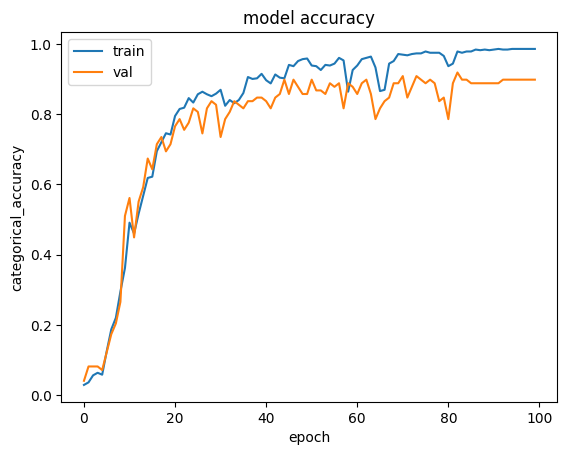

In [43]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('categorical_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.ylim([0,1.2])
plt.show()

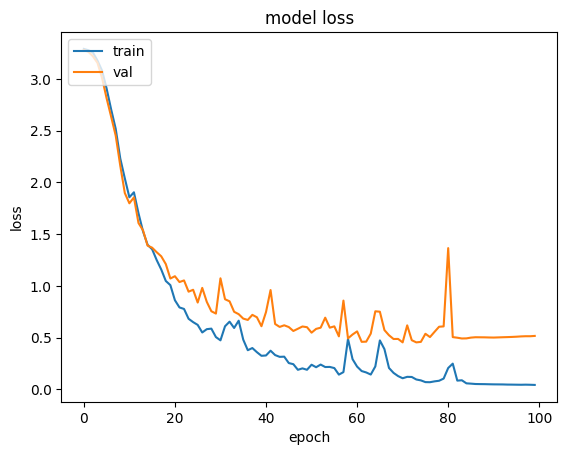

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.ylim([-0.2,1])
plt.show()

### For testing the model

In [44]:
from keras.models import load_model

model = load_model('/content/LSTM_without_face_2.h5.h5')

In [52]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, f1_score, confusion_matrix, classification_report

In [46]:
yhat = model.predict(X_test)

6/6 [==============================] - 1s 32ms/step


In [47]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [ ]:
ytrue[:5]

[21, 23, 26, 21, 16]

In [62]:
conf_mat = confusion_matrix(ytrue, yhat)
conf_mat

array([[ 4,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  6,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],


In [49]:
accuracy_score(ytrue, yhat)

0.9444444444444444

In [50]:
f1_score(ytrue, yhat, average='macro')

0.9459083330809748

In [54]:
print(classification_report(ytrue, yhat, target_names=label_map))

                     precision    recall  f1-score   support

              hello       1.00      0.80      0.89         5
          Dhonnobad       0.75      1.00      0.86         6
           Dukkhito       1.00      1.00      1.00         3
               Apni       1.00      1.00      1.00         8
              Kemon       1.00      1.00      1.00         2
              Achen       1.00      1.00      1.00         7
                Ami       1.00      1.00      1.00         4
          Valo Achi       1.00      1.00      1.00         6
          Doya kore       1.00      1.00      1.00         3
             Aajker       0.86      1.00      0.92         6
             dekhte       1.00      0.92      0.96        12
              dinta       0.80      0.89      0.84         9
            Shundor       1.00      1.00      1.00         4
         Koita Baje       1.00      1.00      1.00        11
               Mach       1.00      1.00      1.00         3
       Shuvo Shokal    

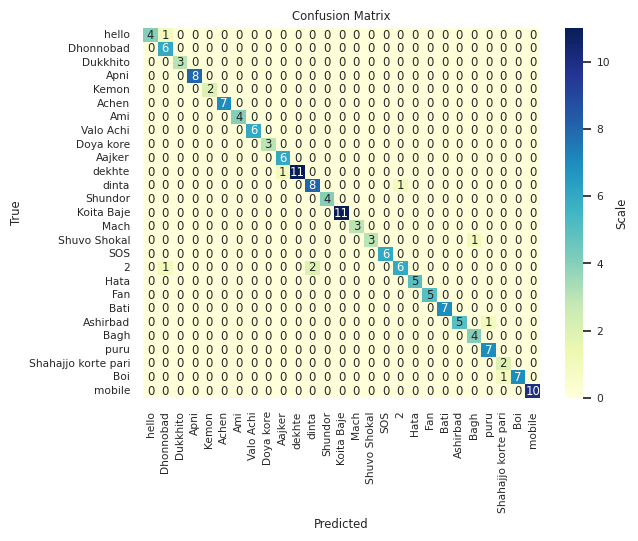

In [84]:
import seaborn as sns
sns.set(font_scale=0.7)
fig, ax = plt.subplots()
sns.heatmap(conf_mat, 
            xticklabels = actions, 
            yticklabels=actions, 
            annot=True, 
            cmap="YlGnBu", 
            cbar_kws={'label': 'Scale'})
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()

In [ ]:
colors = [ (16, 117, 245), (240, 98, 146), (46, 204, 113), (230, 126, 34), (31, 58, 147), (241, 196, 15), (192, 57, 43), (52, 152, 219), (237, 76, 103), (39, 174, 96), (247, 159, 31), (108, 122, 137), (211, 84, 0), (22, 160, 133), (243, 156, 18), (149, 165, 166), (211, 84, 0), (46, 134, 193), (242, 38, 19), (52, 73, 94), (200, 214, 229), (230, 126, 34), (155, 89, 182), (241, 196, 15), (16, 117, 245), (17, 16, 245), (16, 117, 24)]
def prob_viz(res, actions, input_frame, colors):
    li = []
    for num, prob in enumerate(res):
        li.append((num, prob))
    sorted_list = sorted(li, key=lambda tup: tup[1], reverse=True)
    sorted_list = sorted_list[:5]
    i=0
    output_frame = input_frame.copy()
    for num, prob in sorted_list:
        cv2.rectangle(output_frame, (0,60+i*40), (int(prob*100), 90+i*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+i*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        i+=1
    
 #    for num, prob in enumerate(res):
 #        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
 #       cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 1, cv2.LINE_AA)
        
    
    
    return output_frame

In [ ]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

<Figure size 1800x1800 with 0 Axes>

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.1

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]
            
            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)    
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

Apni
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Apni
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Apni
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Apni
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Apni
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Apni
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Apni
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Apni
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Apni
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Apni
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Apni
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Apni
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Apni
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Apni
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Apni
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Apni
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Apni
<cl

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Achen
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Achen
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Achen
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dekhte
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dekhte
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dekhte
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dekhte
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dekhte
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ami
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ami
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ami
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ami
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ami
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ami
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ami
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Achen
<

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Shuvo Shokal
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Shuvo Shokal
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Shuvo Shokal
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Shuvo Shokal
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Shuvo Shokal
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Shuvo Shokal
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Shuvo Shokal
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Shuvo Shokal
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Shuvo Shokal
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Shuvo Shokal
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Valo Achi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Valo Achi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Valo Achi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
SOS
<class 'mediapipe.python.solution_base

Shundor
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Shundor
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Shundor
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Shundor
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Shundor
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Shundor
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Shundor
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Shundor
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Shundor
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Shundor
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Shundor
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Shundor
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Fan
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Fan
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Fan
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Fan
<class 'mediapipe.python.solution

SOS
<class 'mediapipe.python.solution_base.SolutionOutputs'>
SOS
<class 'mediapipe.python.solution_base.SolutionOutputs'>
SOS
<class 'mediapipe.python.solution_base.SolutionOutputs'>
SOS
<class 'mediapipe.python.solution_base.SolutionOutputs'>
SOS
<class 'mediapipe.python.solution_base.SolutionOutputs'>
SOS
<class 'mediapipe.python.solution_base.SolutionOutputs'>
SOS
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Shuvo Shokal
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Shuvo Shokal
<class 'mediapipe.python.solution_base.SolutionOu

SOS
<class 'mediapipe.python.solution_base.SolutionOutputs'>
SOS
<class 'mediapipe.python.solution_base.SolutionOutputs'>
SOS
<class 'mediapipe.python.solution_base.SolutionOutputs'>
SOS
<class 'mediapipe.python.solution_base.SolutionOutputs'>
SOS
<class 'mediapipe.python.solution_base.SolutionOutputs'>
SOS
<class 'mediapipe.python.solution_base.SolutionOutputs'>
SOS
<class 'mediapipe.python.solution_base.SolutionOutputs'>
SOS
<class 'mediapipe.python.solution_base.SolutionOutputs'>
SOS
<class 'mediapipe.python.solution_base.SolutionOutputs'>
SOS
<class 'mediapipe.python.solution_base.SolutionOutputs'>
SOS
<class 'mediapipe.python.solution_base.SolutionOutputs'>
SOS
<class 'mediapipe.python.solution_base.SolutionOutputs'>
SOS
<class 'mediapipe.python.solution_base.SolutionOutputs'>
SOS
<class 'mediapipe.python.solution_base.SolutionOutputs'>
SOS
<class 'mediapipe.python.solution_base.SolutionOutputs'>
SOS
<class 'mediapipe.python.solution_base.SolutionOutputs'>
SOS
<class 'mediapipe.py

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Koita Baje
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Koita Baje
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Koita Baje
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Koita Baje
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Koita Baje
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Koita Baje
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Koita Baje
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Koita Baje
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Koita Baje
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Koita Baje
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Koita Baje
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Koita Baje
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Koita Baje
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Koita Baje
<class 'mediapipe.python.solution_base.SolutionO

Shahajjo korte pari
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Shahajjo korte pari
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Shahajjo korte pari
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Shahajjo korte pari
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Shahajjo korte pari
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Shahajjo korte pari
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Shahajjo korte pari
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Shahajjo korte pari
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Shahajjo korte pari
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Shahajjo korte pari
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Shahajjo korte pari
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Shahajjo korte pari
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Dukkhito
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Dukkhito
<

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Valo Achi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Valo Achi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Valo Achi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Shuvo Shokal
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Shuvo Shokal
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Shuvo Shokal
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Shuvo Shokal
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Shuvo Shokal
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Boi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Boi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Boi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Boi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Boi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Boi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Boi
<class 'mediapipe.pyth

Mach
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Mach
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hata
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hata
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hata
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hata
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hata
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ashirbad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ashirbad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ashirbad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ashirbad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Dhonnobad
<class 'mediapipe.python.solution_base.S

Bati
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Bati
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Bati
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Bati
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Bati
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Bati
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Bati
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Bati
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Bati
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Bati
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Bati
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Bati
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Bati
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Bati
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Bati
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Bati
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Bati
<cl

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Dhonnobad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Dhonnobad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Dhonnobad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Dhonnobad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Dhonnobad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Dhonnobad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Dhonnobad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Dhonnobad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Dhonnobad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Dhonnobad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Dhonnobad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Dhonnobad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Dhonnobad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Dhonnobad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Dhonn

Ashirbad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ashirbad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ashirbad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ashirbad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ashirbad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ashirbad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ashirbad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ashirbad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ashirbad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ashirbad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ashirbad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ashirbad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ashirbad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ashirbad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ashirbad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ashirbad
<

KeyboardInterrupt: 

In [ ]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
res

array([[6.9825165e-02, 1.0325725e-06, 7.1535204e-16, ..., 1.0450599e-12,
        5.1726007e-10, 2.2259022e-05],
       [1.9965472e-03, 7.4969116e-06, 3.0159772e-08, ..., 9.0327784e-10,
        1.6012618e-06, 3.1716218e-07],
       [6.6136879e-12, 5.5188502e-06, 2.5422081e-05, ..., 1.0484900e-14,
        1.0408376e-05, 9.9826461e-01],
       ...,
       [1.0216648e-05, 2.5873128e-03, 5.8485903e-03, ..., 7.5817383e-08,
        9.7843605e-01, 1.2610745e-04],
       [1.9571664e-05, 2.8996083e-03, 2.7821867e-03, ..., 1.7427212e-09,
        9.3268406e-01, 3.4515120e-04],
       [9.9477875e-01, 5.3453841e-05, 2.8266438e-11, ..., 5.5494154e-11,
        1.8221204e-08, 1.0816973e-05]], dtype=float32)

In [ ]:
np.argmax(res)

21

In [ ]:
np.expand_dims(X_test[0], axis=0)

array([[[ 0.58248341,  0.2891522 , -0.84128428, ...,  0.13298762,
          0.25379452, -0.0057917 ],
        [ 0.58218354,  0.28918859, -0.84111404, ...,  0.13465738,
          0.25512493, -0.00611607],
        [ 0.58216053,  0.28921479, -0.83945751, ...,  0.13440585,
          0.25508264, -0.00442341],
        ...,
        [ 0.58207011,  0.288809  , -0.83937567, ...,  0.13478483,
          0.25221652, -0.00766106],
        [ 0.58246046,  0.28885394, -0.841057  , ...,  0.13723263,
          0.25362575, -0.00525876],
        [ 0.58235794,  0.28880724, -0.82812136, ...,  0.13726453,
          0.25366911, -0.00585892]]])

In [ ]:
model.predict(np.expand_dims(X_test[0], axis=0))

array([[6.98255450e-02, 1.03258219e-06, 7.15365487e-16, 8.71337117e-12,
        3.85333388e-12, 1.22833415e-08, 1.77702672e-10, 2.18183304e-05,
        4.23806013e-09, 3.10975921e-08, 8.29566704e-15, 8.68983982e-11,
        8.45671189e-13, 1.09153124e-10, 2.19868696e-07, 1.03579904e-03,
        1.07230976e-13, 1.02569038e-06, 1.16328724e-08, 2.70514271e-11,
        3.95559319e-08, 9.29059565e-01, 2.99297062e-05, 2.68844565e-06,
        1.04507353e-12, 5.17265841e-10, 2.22591607e-05]], dtype=float32)

In [ ]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame